In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler



In [3]:
pd.set_option('display.max_rows',100)    #set the number to display

In [4]:
train=pd.read_csv("train (1).csv")

### Step 1 - EDA

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.shape

(1460, 81)

In [7]:
train.drop(["Id"],axis=1,inplace=True)   #ID not required

In [8]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [9]:
[features for features in train.columns if train[features].isna().sum()>0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
#Dropping the columns with more than 40% of null values
train.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [11]:
#train.isna().sum()/train.shape[0]    # to find the null values percentage
trainNullper=train.apply(lambda x : np.round( x.isnull().sum()/train.shape[0],4))*100   #round the value to 4 numbers
trainNulcount=train.isnull().sum()  
trainNullDF=pd.DataFrame([trainNulcount,trainNullper]).T   #T stands for transpose
trainNullDF.columns=["Nullcount","Nullpercentage"]   #columns to give new name to columns
trainNullDF.sort_values(by="Nullcount",ascending=False,inplace=True)  
trainNullDF.reset_index(inplace=True)
trainNullDF.head(20)

,index,Nullcount,Nullpercentage
0,LotFrontage,259.0,17.74
1,GarageType,81.0,5.55
2,GarageYrBlt,81.0,5.55
3,GarageFinish,81.0,5.55
4,GarageQual,81.0,5.55
5,GarageCond,81.0,5.55
6,BsmtFinType2,38.0,2.60
7,BsmtExposure,38.0,2.60
8,BsmtQual,37.0,2.53
9,BsmtCond,37.0,2.53


In [12]:
trainNullDF[:14]["index"]  # to get index of null values

0      LotFrontage
1       GarageType
2      GarageYrBlt
3     GarageFinish
4       GarageQual
5       GarageCond
6     BsmtFinType2
7     BsmtExposure
8         BsmtQual
9         BsmtCond
10    BsmtFinType1
11      MasVnrArea
12      MasVnrType
13      Electrical
Name: index, dtype: object

In [13]:
nullcolumns=np.array(trainNullDF[:14]["index"])  #saving it as np array to get column names alone
nullcolumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [14]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [15]:
for column in nullcolumns:
    if train[column].dtype=="object":
        print(column,"is object type")
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        print(f"{column} is numerical")
        train[column].fillna(train[column].median(),inplace=True)

LotFrontage is numerical
GarageType is object type
GarageYrBlt is numerical
GarageFinish is object type
GarageQual is object type
GarageCond is object type
BsmtFinType2 is object type
BsmtExposure is object type
BsmtQual is object type
BsmtCond is object type
BsmtFinType1 is object type
MasVnrArea is numerical
MasVnrType is object type
Electrical is object type


In [16]:
trainNullper=train.apply(lambda x : np.round( x.isnull().sum()/train.shape[0],4))*100   #round the value to 4 numbers
trainNulcount=train.isnull().sum()  
trainNullDF=pd.DataFrame([trainNulcount,trainNullper]).T   #T stands for transpose
trainNullDF.columns=["Nullcount","Nullpercentage"]   #columns to give new name to columns
trainNullDF.sort_values(by="Nullcount",ascending=False,inplace=True)  
trainNullDF.reset_index(inplace=True)
trainNullDF.head(20)


,index,Nullcount,Nullpercentage
0,MSSubClass,0.0,0.0
1,GarageYrBlt,0.0,0.0
2,Fireplaces,0.0,0.0
3,Functional,0.0,0.0
4,TotRmsAbvGrd,0.0,0.0
5,KitchenQual,0.0,0.0
6,KitchenAbvGr,0.0,0.0
7,BedroomAbvGr,0.0,0.0
8,HalfBath,0.0,0.0
9,FullBath,0.0,0.0


In [17]:
numericalcolumn=train.select_dtypes(include=np.number).columns
numericalcolumn

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
objectcolumns=train.select_dtypes(include=np.object).columns
objectcolumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

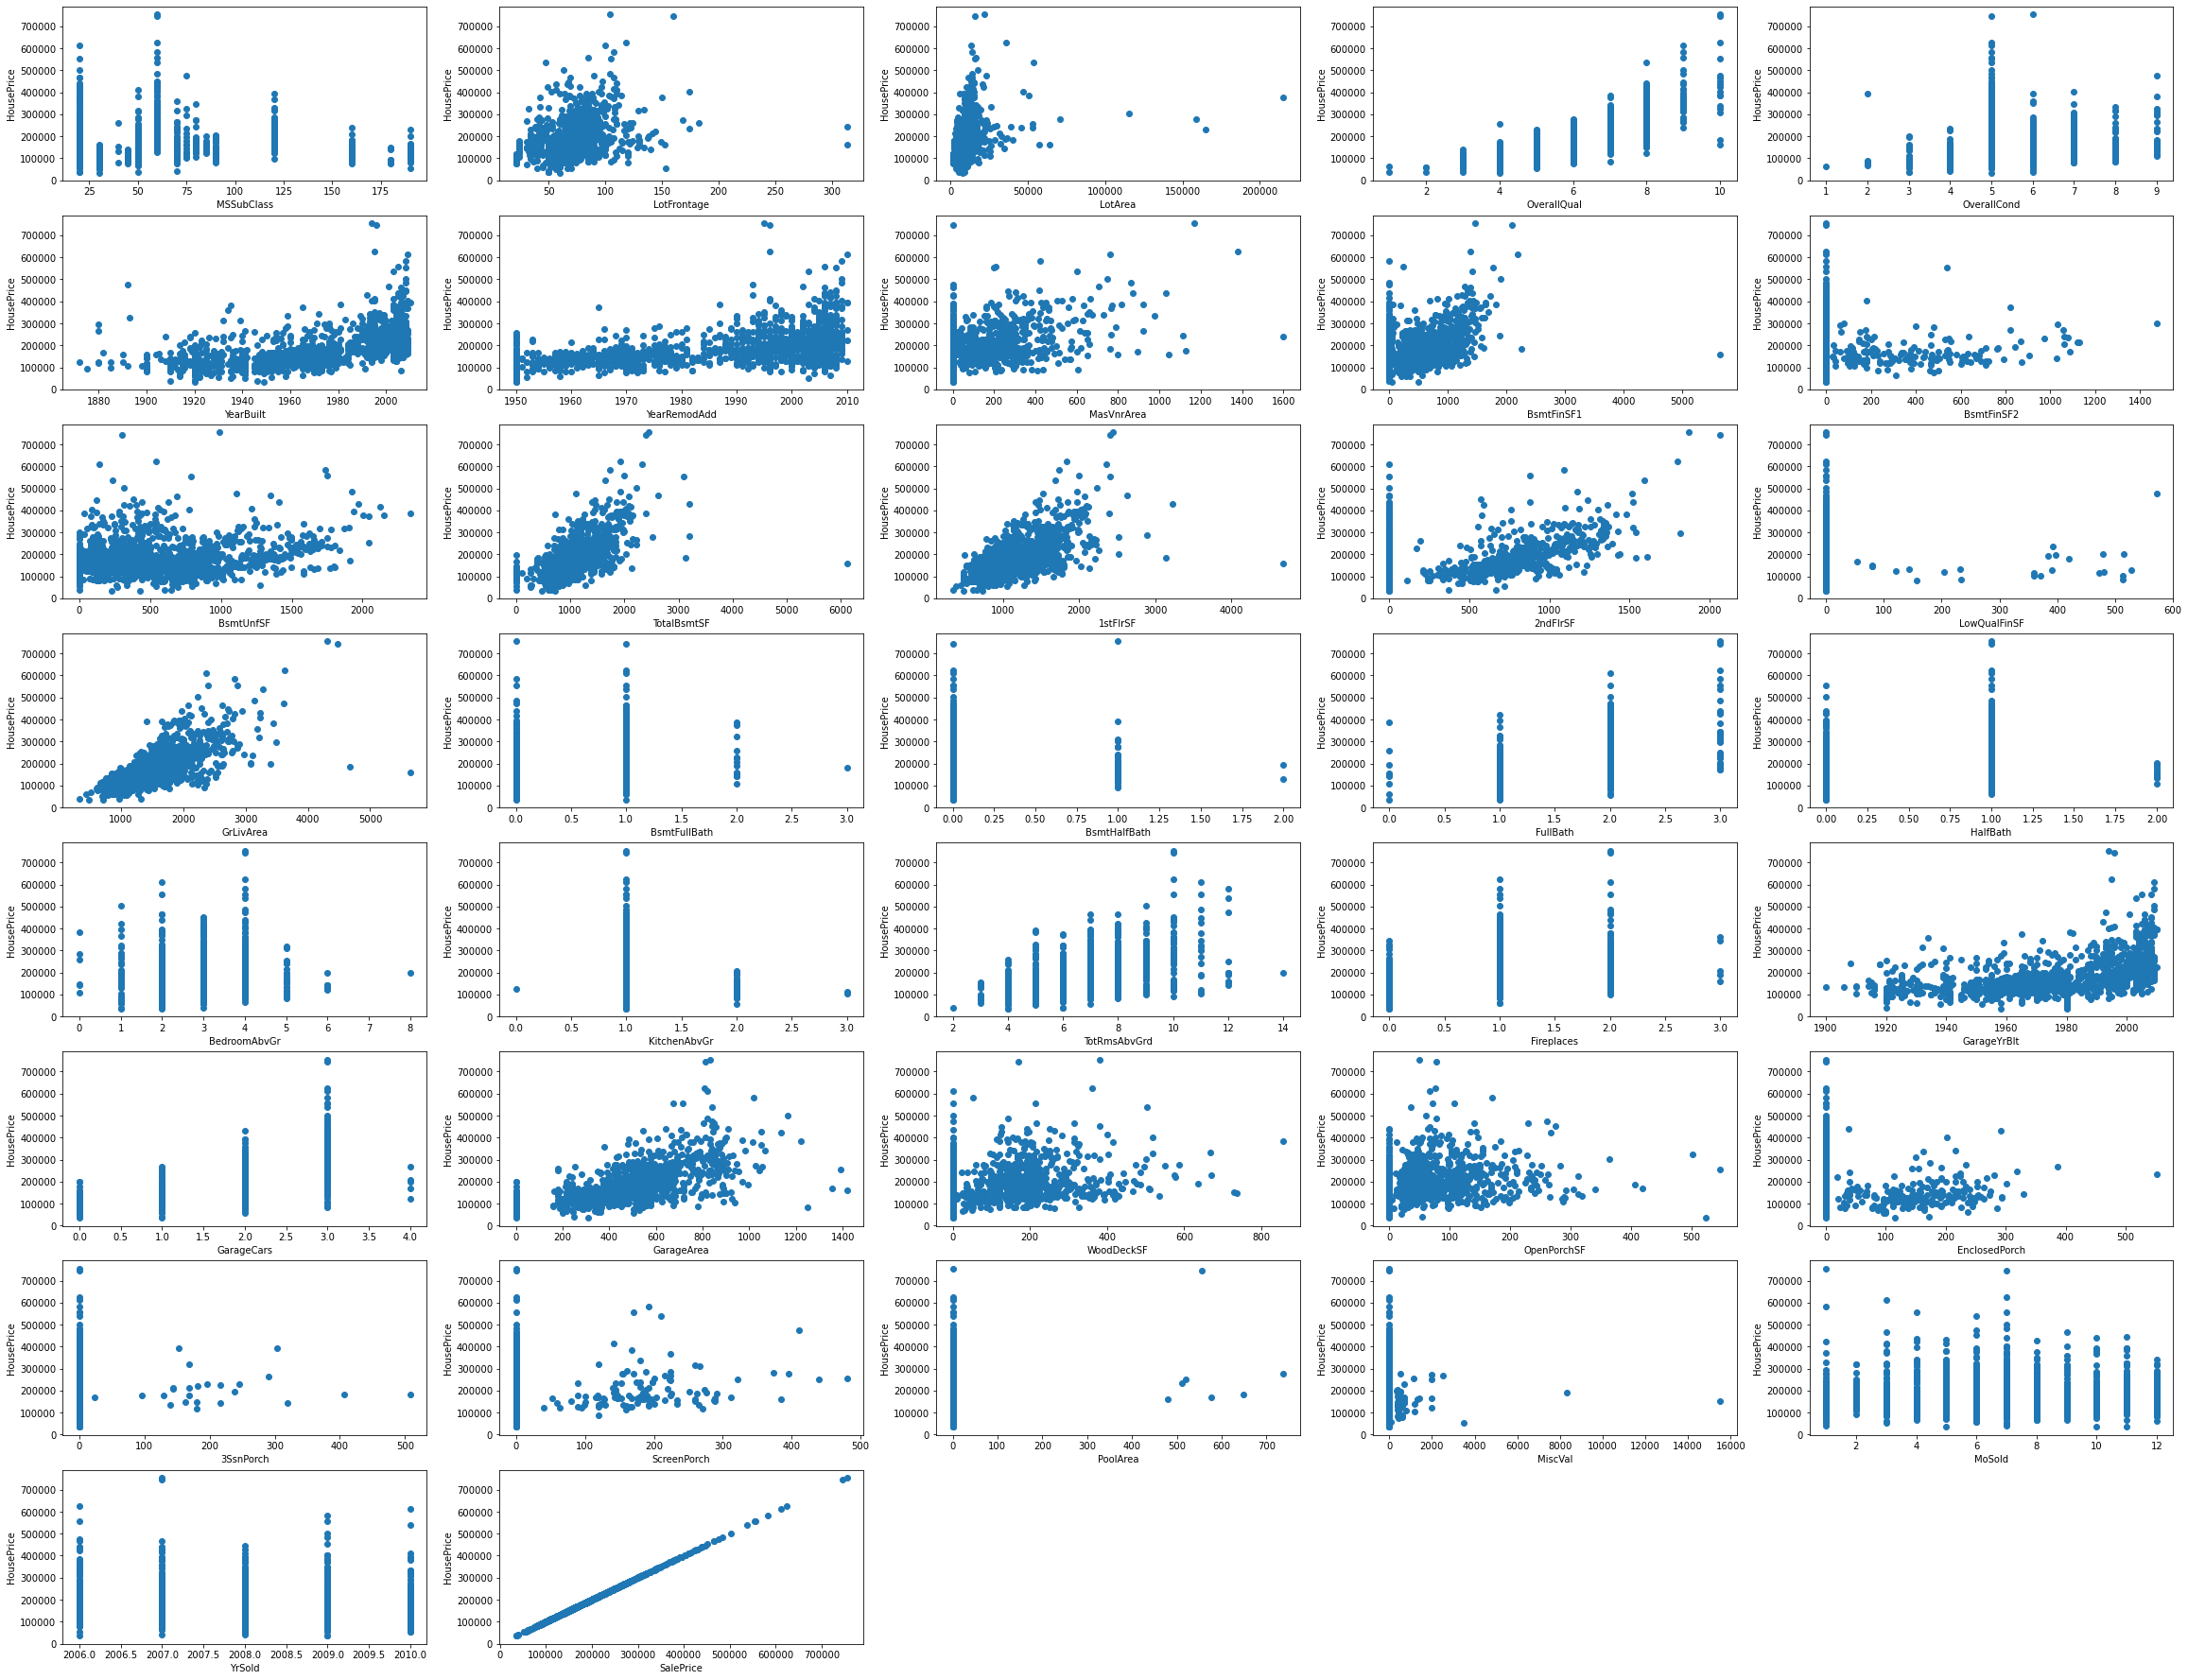

In [19]:
j=0
plt.figure(figsize=(40,40))
for column in numericalcolumn:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train["SalePrice"])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j=j+1



In [20]:
discriatecols=[]
continuescols=[]
for column in numericalcolumn:
    if train[column].nunique()>20:
        continuescols.append(column)
    else:
        discriatecols.append(column)


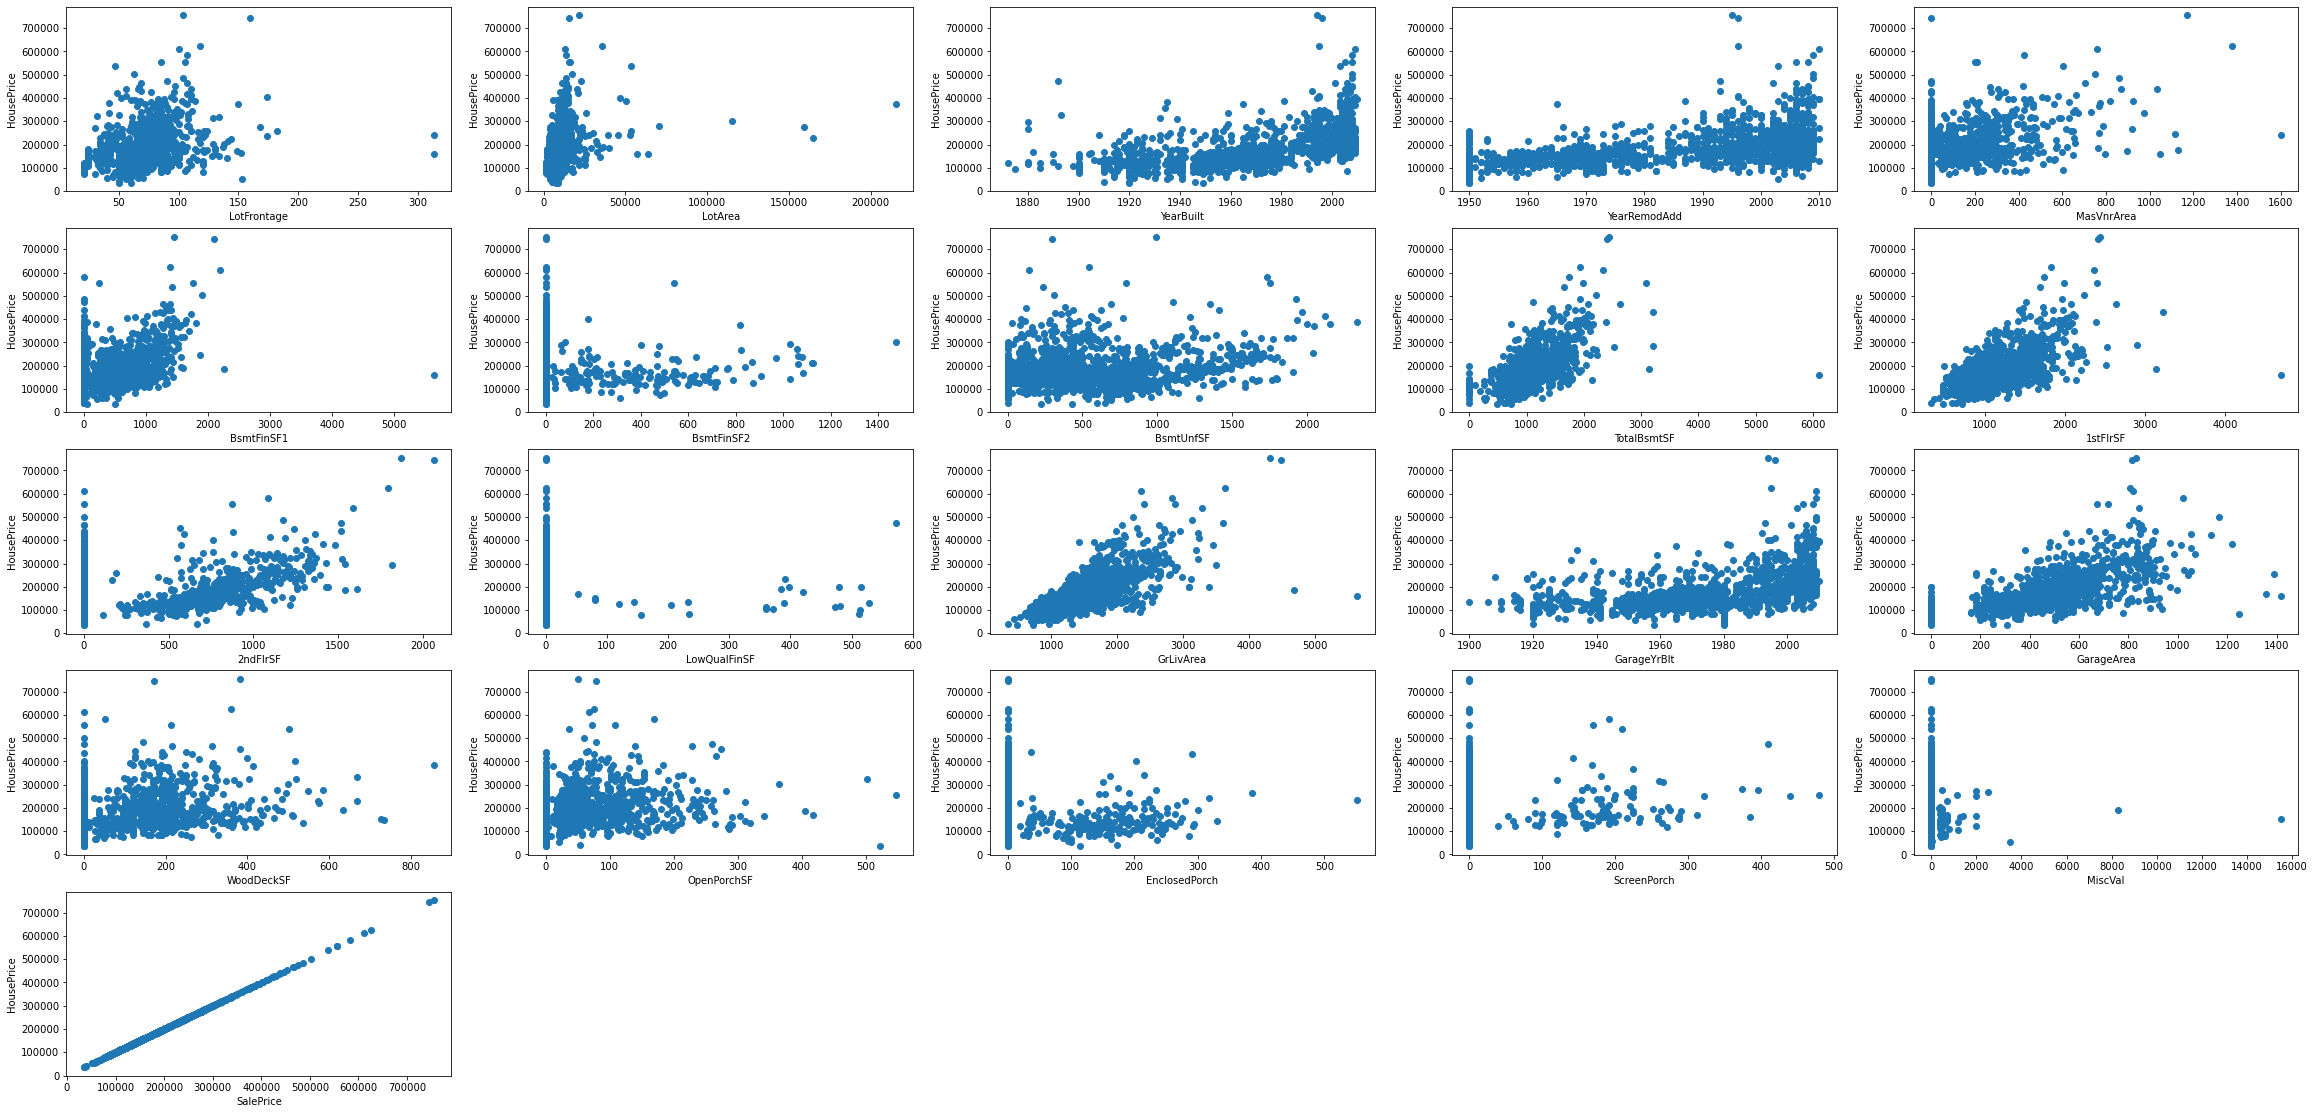

In [21]:
j=0
plt.figure(figsize=(40,40))
for column in continuescols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train["SalePrice"])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j=j+1

In [22]:
discriatecols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

In [23]:
observationval=train.groupby("MSSubClass")["SalePrice"].mean()
observationvalDF=pd.DataFrame(observationval).sort_values(by= "SalePrice",ascending=False)
observationvalDF.reset_index(inplace=True)
observationvalDF

,MSSubClass,SalePrice
0,60,239948.501672
1,120,200779.080460
2,75,192437.500000
3,20,185224.811567
4,80,169736.551724
5,70,166772.416667
6,40,156125.000000
7,85,147810.000000
8,50,143302.972222
9,160,138647.380952


<BarContainer object of 15 artists>

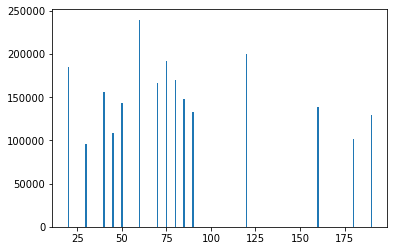

In [24]:
plt.bar(observationvalDF['MSSubClass'],observationvalDF['SalePrice'])

In [25]:
# def barplot(data,i,column):
#     for i in discriatecols:
#         observationval=data.groupby(i)[column].mean()
#         observationvalDF=pd.DataFrame(observationval).sort_values(by= column,ascending=False)
#         observationvalDF.reset_index(inplace=True)
#         plt.bar(observationvalDF[i],observationvalDF[column])

#         return observationvalDF

        
        

        

In [26]:
# barplot(train,"MSSubClass","SalePrice")

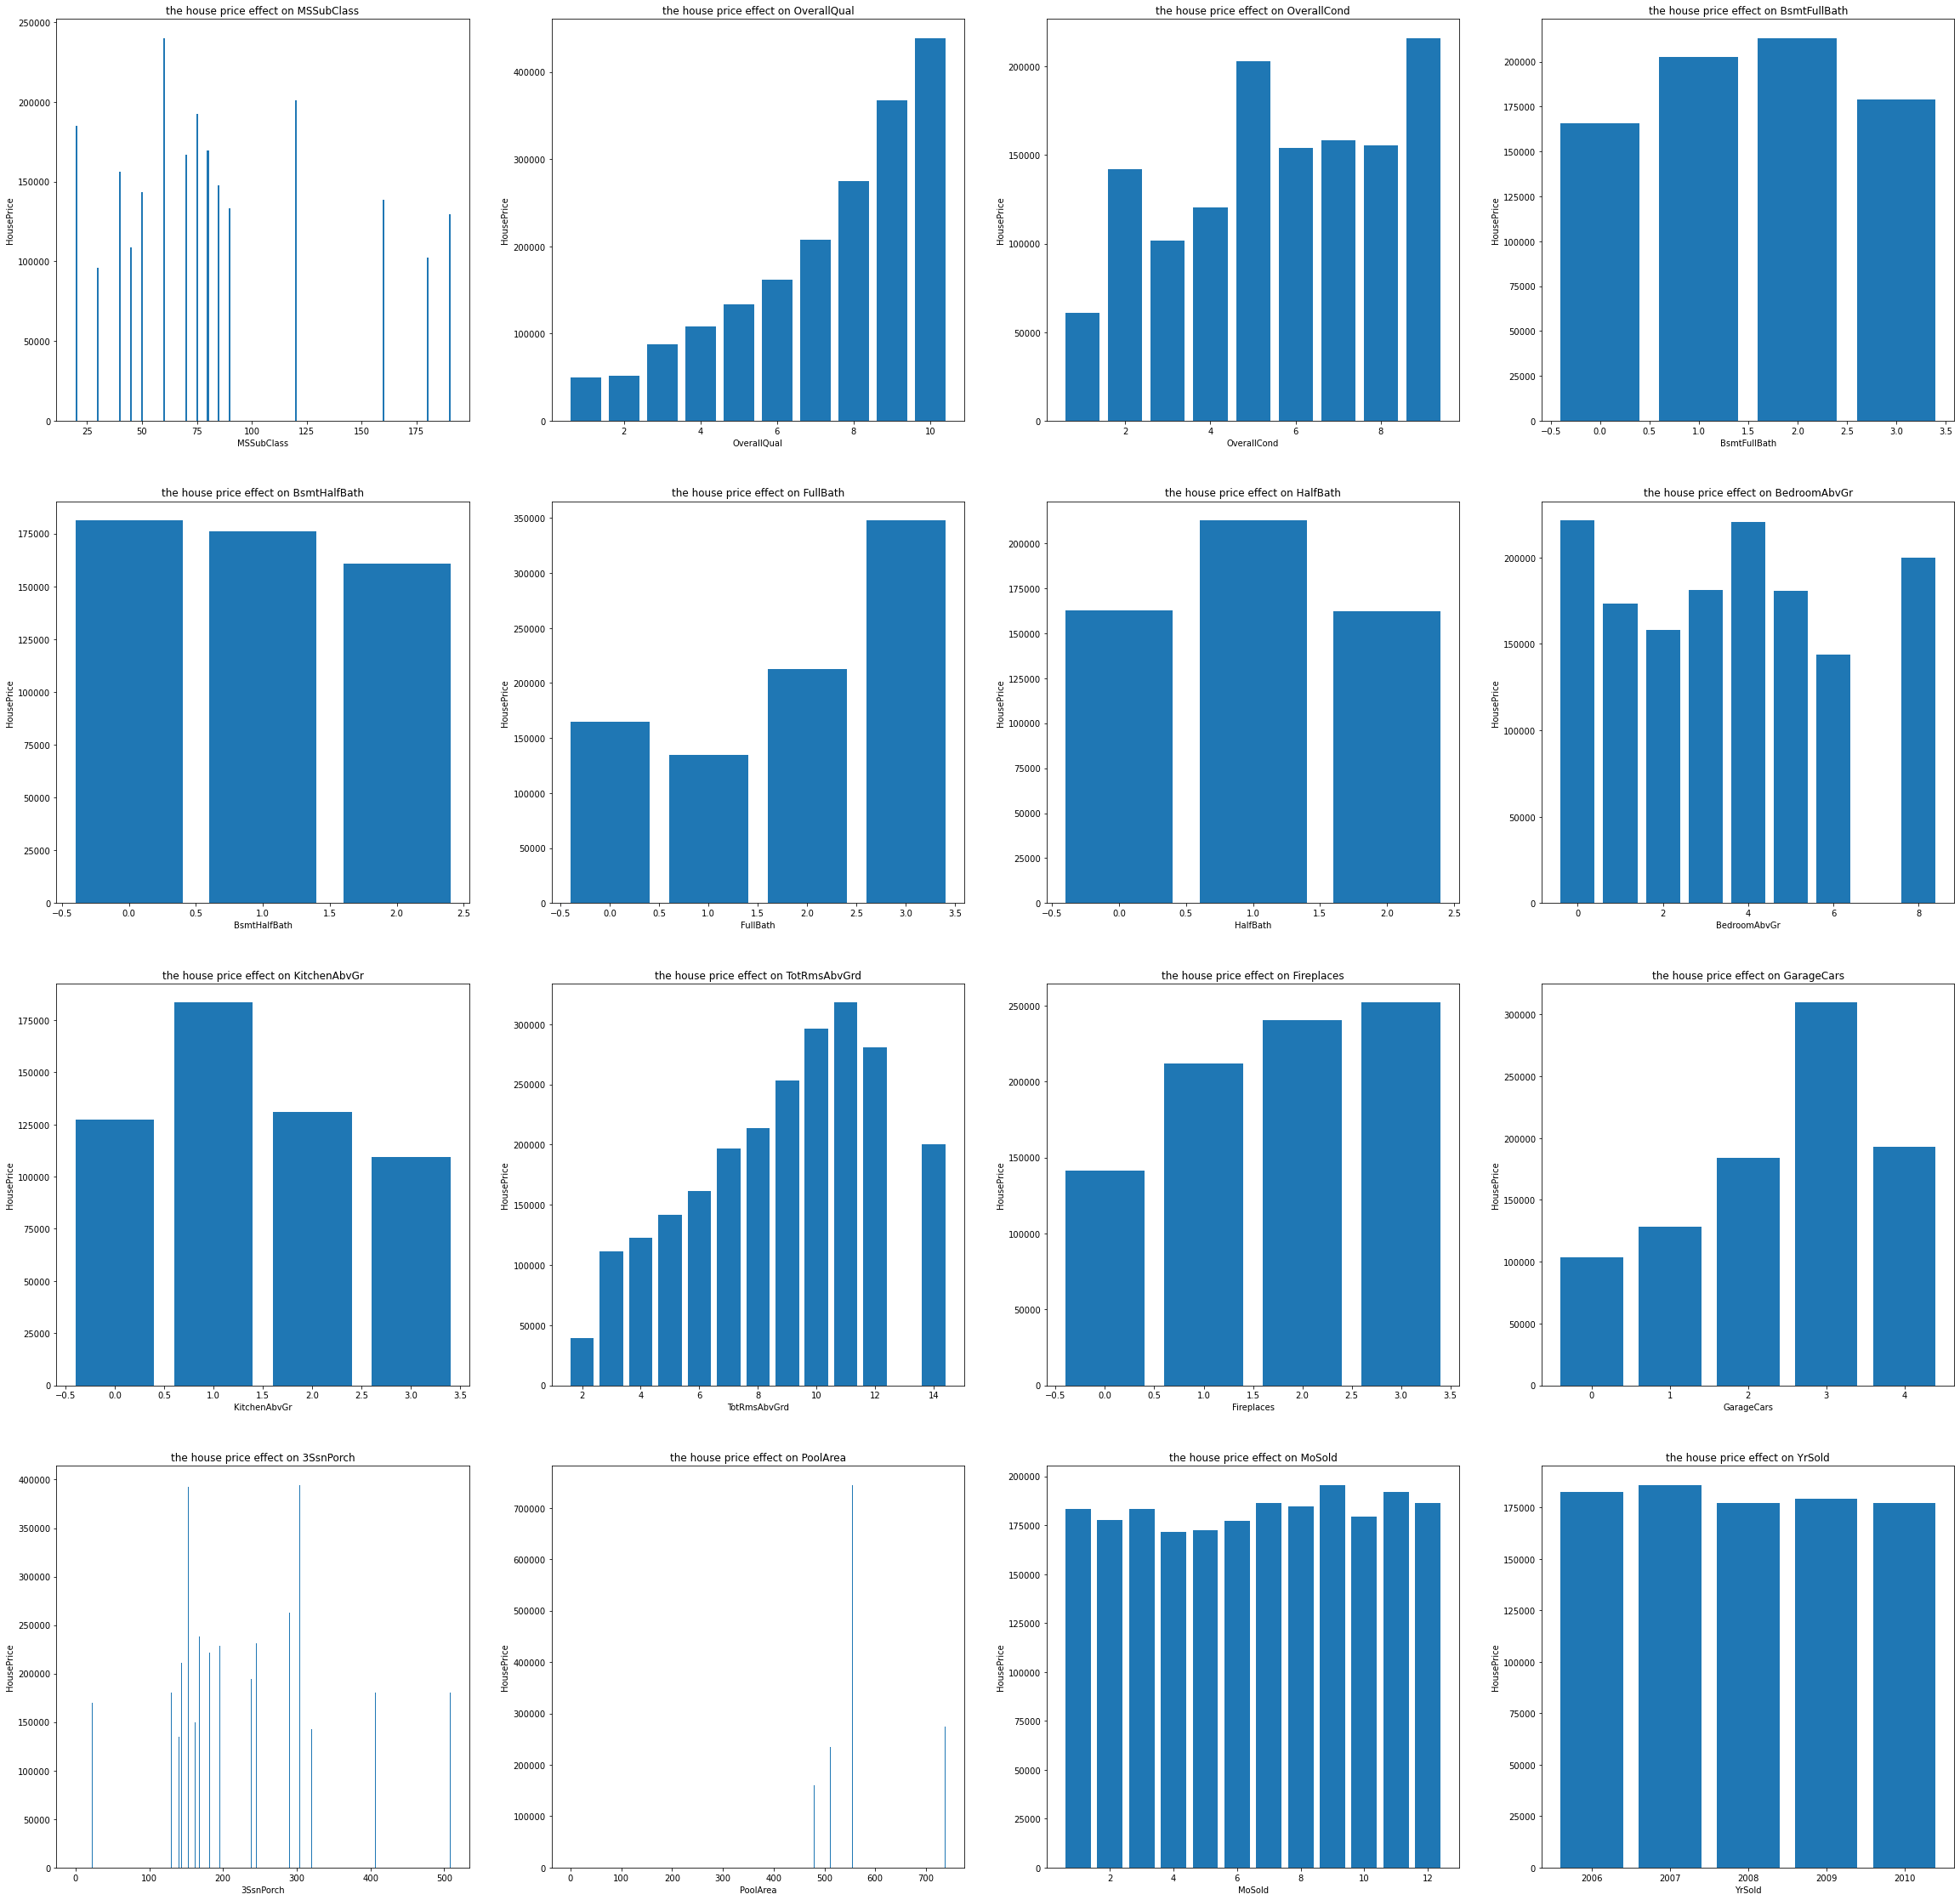

In [27]:
j=0
plt.figure(figsize=(40,40))
for column in discriatecols:
    plt.subplot(4,4,j+1)
    observationval=train.groupby(column)["SalePrice"].mean()
    observationvalDF=pd.DataFrame(observationval).sort_values(by= "SalePrice",ascending=False)
    observationvalDF.reset_index(inplace=True)
    plt.bar(observationvalDF[column],observationvalDF['SalePrice'])
    plt.title(f"the house price effect on {column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j=j+1

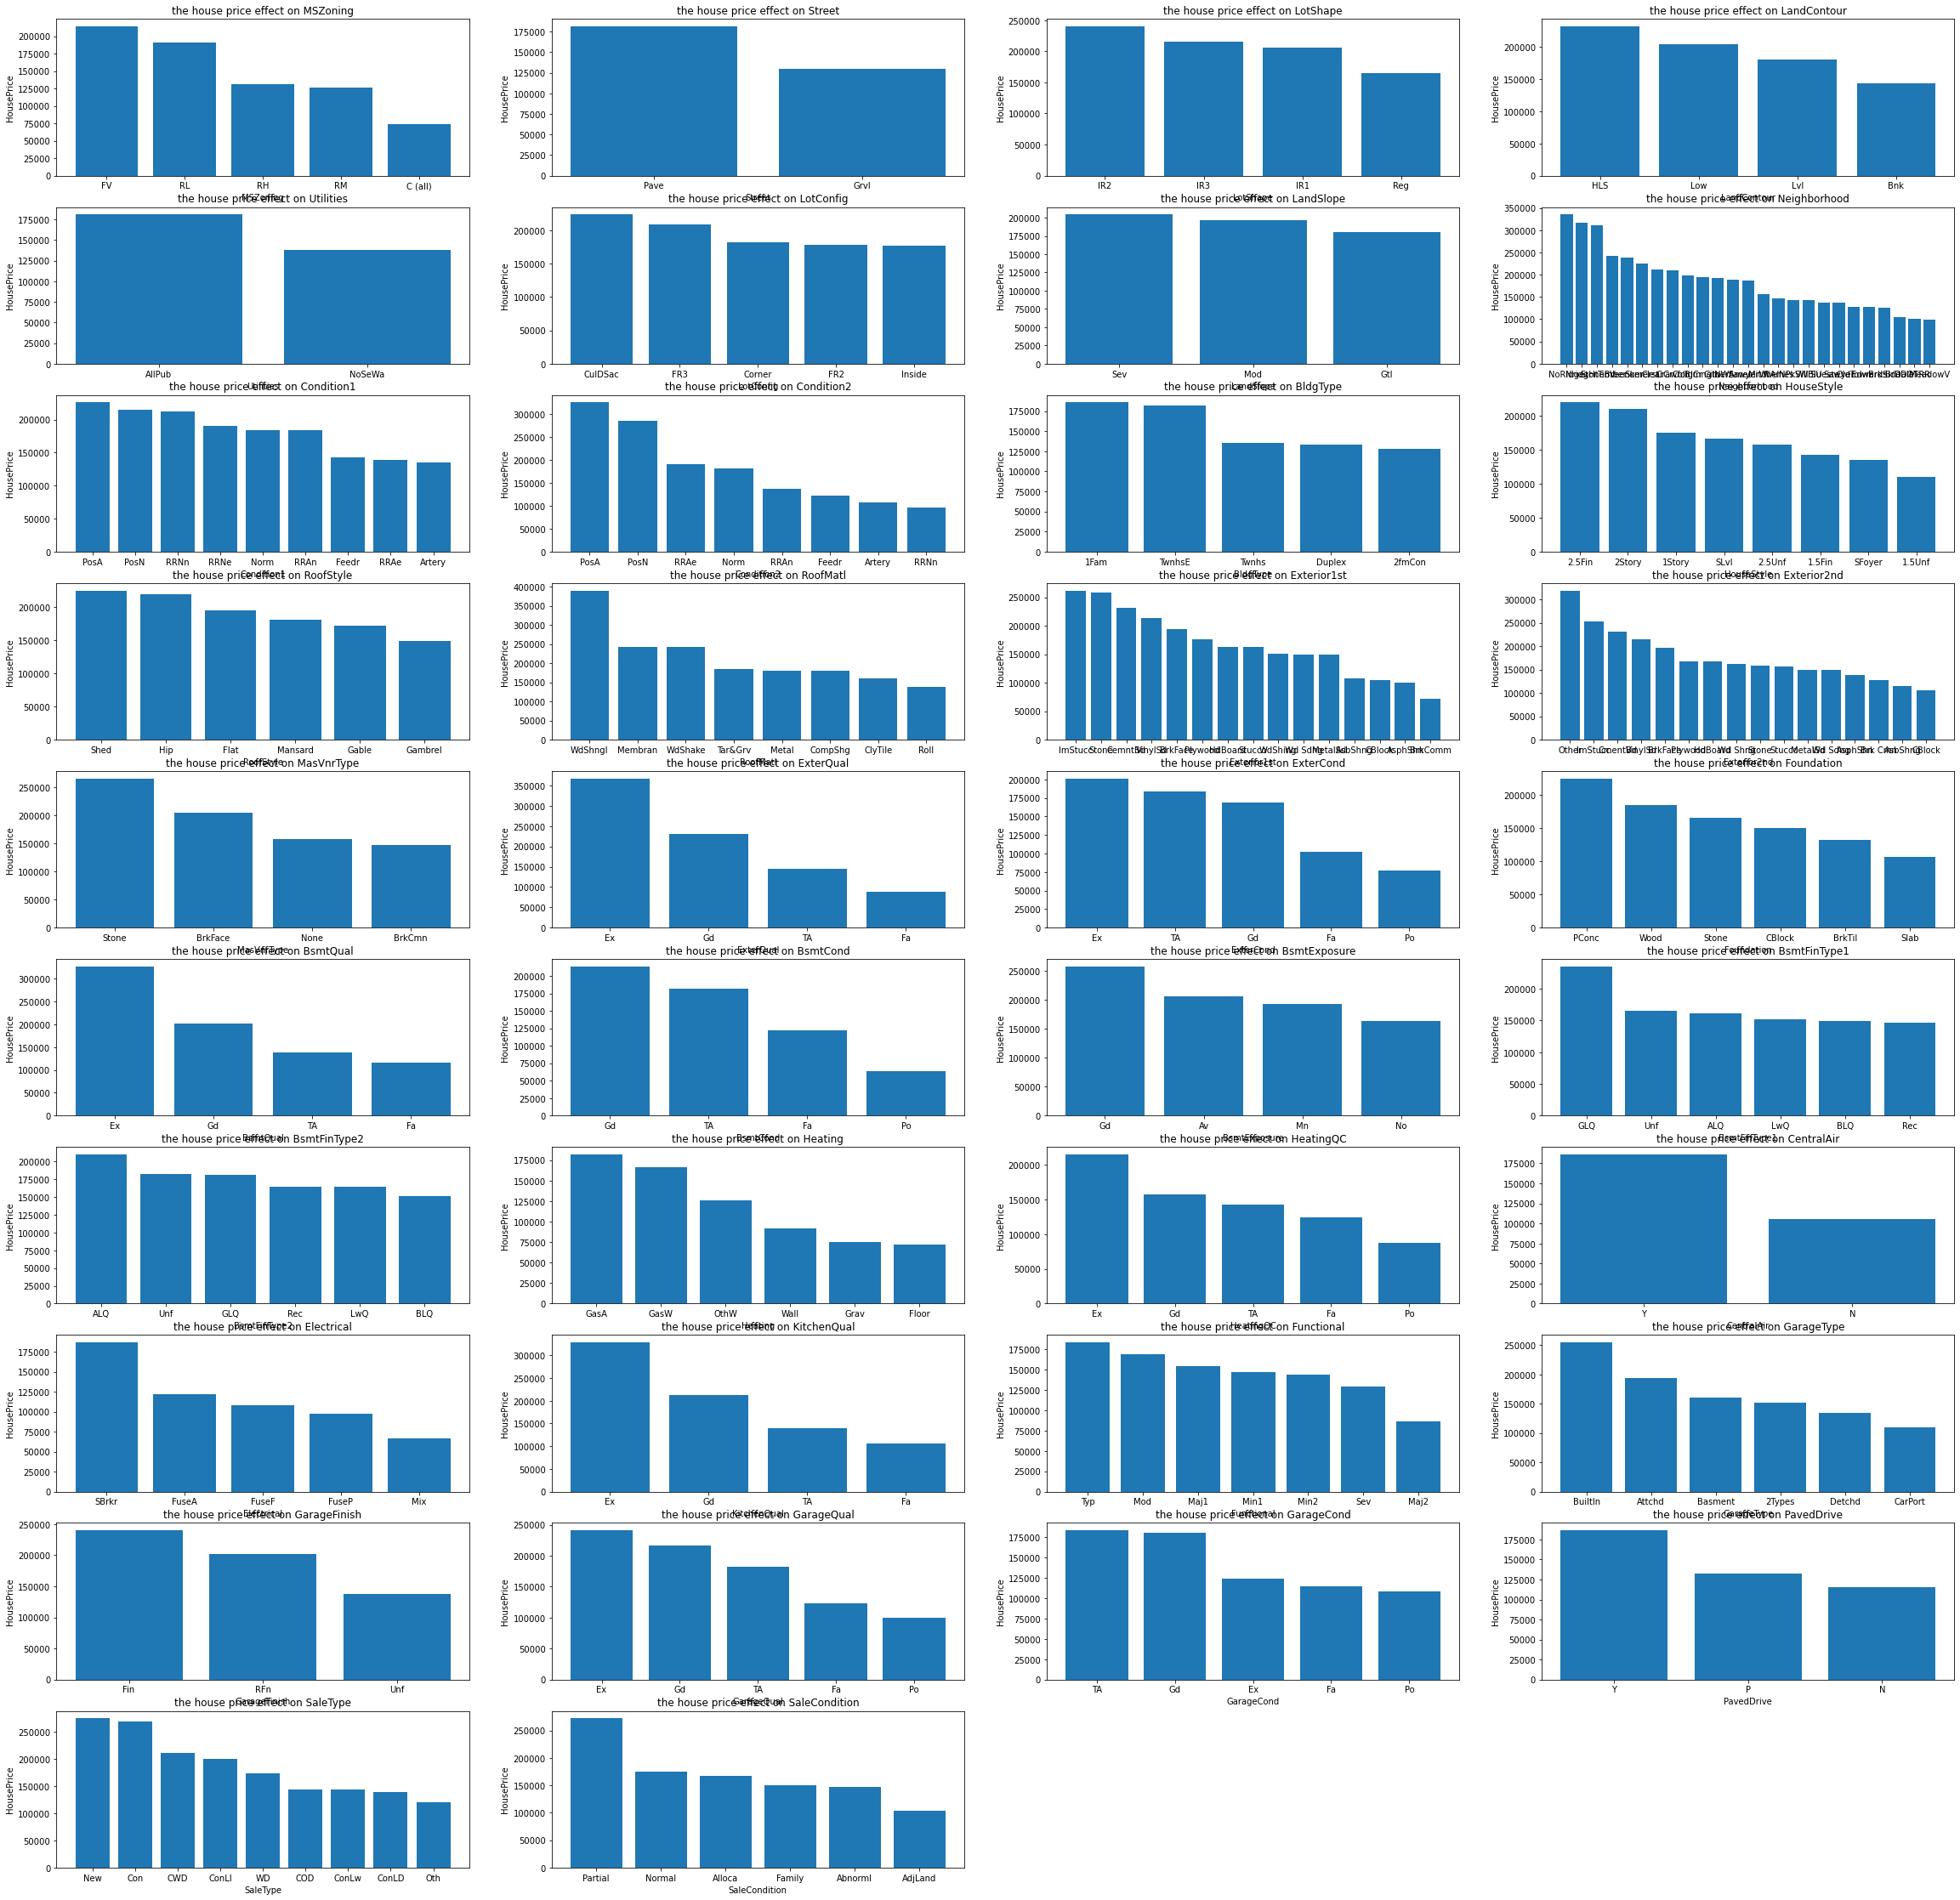

In [28]:
j=0
plt.figure(figsize=(40,40))
for column in objectcolumns:
    plt.subplot(10,4,j+1)
    observationval=train.groupby(column)["SalePrice"].mean()
    observationvalDF=pd.DataFrame(observationval).sort_values(by= "SalePrice",ascending=False)
    observationvalDF.reset_index(inplace=True)
    plt.bar(observationvalDF[column],observationvalDF['SalePrice'])
    plt.title(f"the house price effect on {column}")
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j=j+1

### Handling outliers


In [29]:
continuescols


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [30]:
train.shape

(1460, 75)

In [31]:
train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [32]:
upper_limit=train['LotFrontage'].mean()+3*train['LotFrontage'].std()
lower_limit=train['LotFrontage'].mean()-3*train['LotFrontage'].std()
upper_limit



135.9467298969942

In [33]:
# upper_limit=train['LotFrontage'].mean()+3*train['LotFrontage'].std()
# lower_limit=train['LotFrontage'].mean()-3*train['LotFrontage'].std()        #capping steps
# train.loc[(train['LotFrontage']>upper_limit),'LotFrontage']=upper_limit
# train.loc[(train['LotFrontage']>lower_limit),'LotFrontage']=lower_limit

### capping steps using for loop
  

In [34]:
for column in continuescols:
    upper_limit=train[column].mean()+3*train[column].std()
    lower_limit=train[column].mean()-3*train[column].std()        #capping steps using for loop
    train.loc[(train[column]>upper_limit),column]=upper_limit
    train.loc[(train[column]<lower_limit),column]=lower_limit

In [35]:
train[(train['LotFrontage']<= upper_limit )& (train['LotFrontage'] >= lower_limit)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.000000,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.000000,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.000000,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,1531.858114,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112.000000,0,0.0,0,0.000000,4,2010,WD,Normal,142125.0


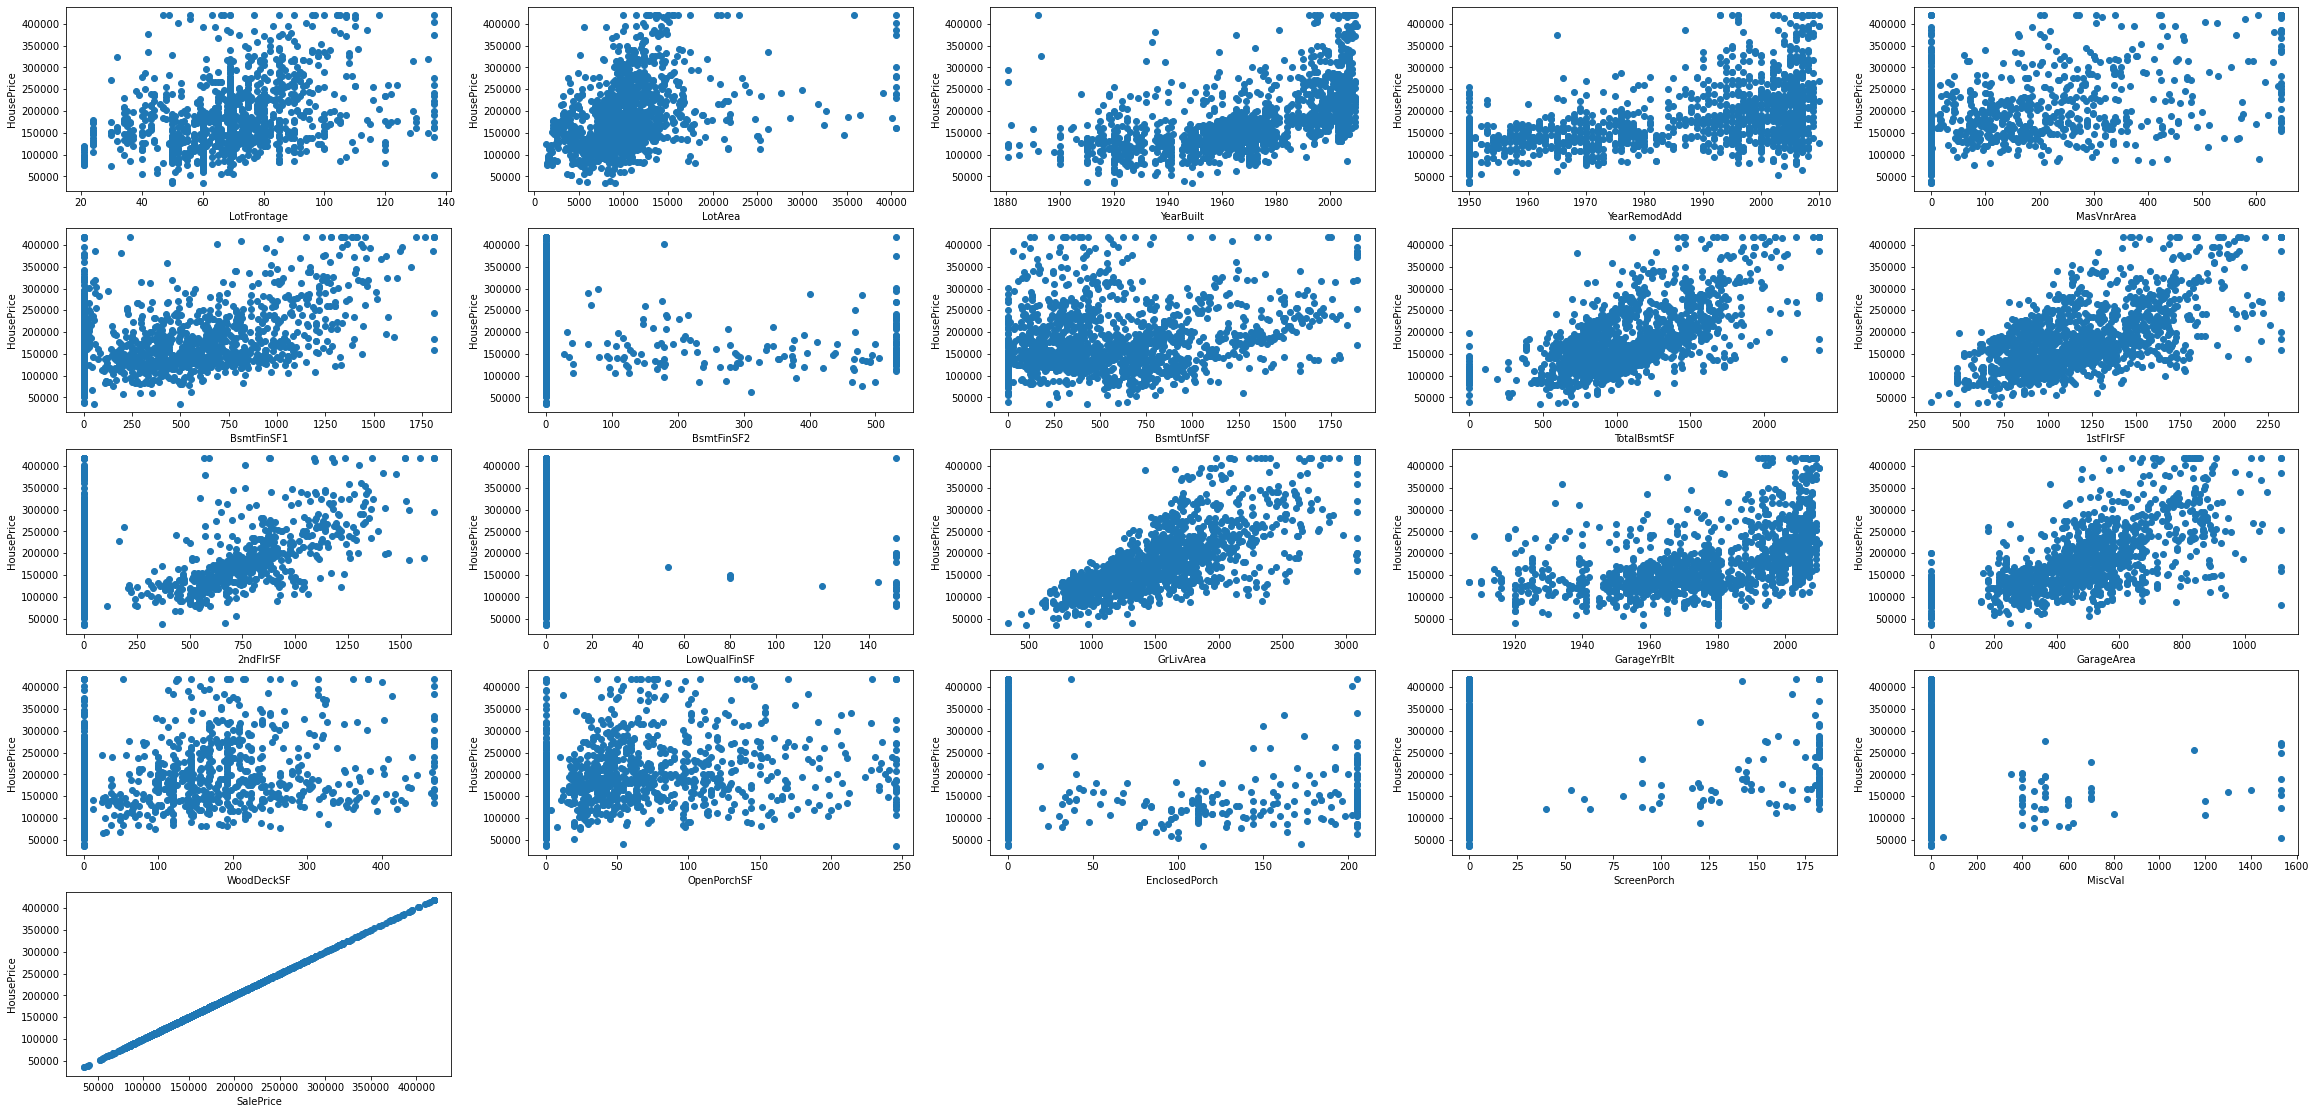

In [36]:
j=0
plt.figure(figsize=(40,40))
for column in continuescols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train["SalePrice"])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j=j+1

In [37]:
objectcolumns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
msZoningLE=LabelEncoder()
msZoningLE.fit_transform(train['MSZoning']) #instead of creating 38 times we can use below method

array([3, 3, 3, ..., 3, 3, 3])

In [39]:
trainobjDF=train[objectcolumns]

In [40]:
trainobjDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


### single step to do Label Encoding for all columns

In [41]:
from collections import defaultdict
defaultEncoder = defaultdict(LabelEncoder)  

# variable encoding
fitobjDF=trainobjDF.apply(lambda x : defaultEncoder[x.name].fit_transform(x))





        


In [42]:
fitobjDF   #label Encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [43]:
defaultEncoder['LotShape'].transform(["Reg"])   #to check whether transform is correct or not

array([3])

In [44]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0,0.0,0,0.0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,205.311555,0,0.0,0,0.0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0,0.0,0,0.0,12,2008,WD,Normal,250000.0


In [45]:
train.drop(objectcolumns,axis=1,inplace=True)

In [46]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.000000,0,0.0,0,0.0,2,2008,208500.0
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.000000,0,0.0,0,0.0,5,2007,181500.0
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.000000,0,0.0,0,0.0,9,2008,223500.0
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,205.311555,0,0.0,0,0.0,2,2006,140000.0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.000000,0,0.0,0,0.0,12,2008,250000.0


In [47]:

updatedTrain=pd.concat([train,fitobjDF],axis=1)

In [48]:
updatedTrain

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,0.000000,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,0.000000,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,6,5,1999.0,2000.0,0.0,0.0,0.000000,...,4,3,6,1,1,4,4,2,8,4
1456,20,85.0,13175.0,6,6,1978.0,1988.0,119.0,790.0,163.000000,...,4,3,2,1,2,4,4,2,8,4
1457,70,66.0,9042.0,7,9,1941.0,2006.0,0.0,275.0,0.000000,...,4,2,6,1,1,4,4,2,8,4
1458,20,68.0,9717.0,5,6,1950.0,1996.0,0.0,49.0,530.507133,...,0,2,6,1,2,4,4,2,8,4


In [49]:
corrDF=updatedTrain.corr()

In [50]:
corrDF

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSSubClass,1.000000,-0.395731,-0.279702,0.032628,-0.059316,0.027944,0.040581,0.020520,-0.073235,-0.066358,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.395731,1.000000,0.458598,0.235827,-0.059777,0.124378,0.076849,0.184107,0.146580,0.046492,...,0.062975,-0.186328,0.028982,-0.234304,-0.221586,0.051692,0.044213,0.095942,-0.032726,0.064632
LotArea,-0.279702,0.458598,1.000000,0.181943,-0.015925,0.037913,0.038069,0.153834,0.239187,0.082894,...,0.059112,-0.114712,-0.044227,-0.175576,-0.168933,0.019339,0.038518,0.014115,0.001833,0.045476
OverallQual,0.032628,0.235827,0.181943,1.000000,-0.091932,0.573183,0.550684,0.416804,0.230085,-0.085303,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.059777,-0.015925,-0.091932,1.000000,-0.376205,0.073741,-0.131177,-0.044549,0.054472,...,0.062664,0.067984,0.094040,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
YearBuilt,0.027944,0.124378,0.037913,0.573183,-0.376205,1.000000,0.593659,0.328898,0.252930,-0.063908,...,0.338915,-0.359384,0.154651,-0.443934,-0.590385,0.304135,0.246913,0.427485,-0.052367,0.201311
YearRemodAdd,0.040581,0.076849,0.038069,0.550684,0.073741,0.593659,1.000000,0.182833,0.126435,-0.088854,...,0.344514,-0.452431,0.079903,-0.271764,-0.456786,0.130241,0.150579,0.168457,0.019647,0.221687
MasVnrArea,0.020520,0.184107,0.153834,0.416804,-0.131177,0.328898,0.182833,1.000000,0.250260,-0.076081,...,0.116759,-0.263543,0.092105,-0.178620,-0.278422,0.113714,0.071267,0.154841,-0.062240,0.085328
BsmtFinSF1,-0.073235,0.146580,0.239187,0.230085,-0.044549,0.252930,0.126435,0.250260,1.000000,-0.041027,...,0.157218,-0.178807,0.044579,-0.242146,-0.246545,0.127551,0.100624,0.197006,0.012959,0.027687
BsmtFinSF2,-0.066358,0.046492,0.082894,-0.085303,0.054472,-0.063908,-0.088854,-0.076081,-0.041027,1.000000,...,0.015672,0.079340,-0.108940,-0.016654,0.044394,0.045400,-0.008157,0.067335,-0.029363,-0.057059


In [51]:
corrDF['SalePrice']

MSSubClass      -0.088248
LotFrontage      0.359755
LotArea          0.381589
OverallQual      0.810469
OverallCond     -0.079194
YearBuilt        0.550119
YearRemodAdd     0.534087
MasVnrArea       0.468188
BsmtFinSF1       0.398349
BsmtFinSF2      -0.039318
BsmtUnfSF        0.218271
TotalBsmtSF      0.649209
1stFlrSF         0.629285
2ndFlrSF         0.306770
LowQualFinSF    -0.052332
GrLivArea        0.722471
BsmtFullBath     0.239062
BsmtHalfBath    -0.026792
FullBath         0.569415
HalfBath         0.289295
BedroomAbvGr     0.169804
KitchenAbvGr    -0.143346
TotRmsAbvGrd     0.533566
Fireplaces       0.477834
GarageYrBlt      0.488076
GarageCars       0.663012
GarageArea       0.650517
WoodDeckSF       0.339119
OpenPorchSF      0.358735
EnclosedPorch   -0.152807
3SsnPorch        0.050598
ScreenPorch      0.100159
PoolArea         0.059439
MiscVal         -0.041144
MoSold           0.060833
YrSold          -0.029711
SalePrice        1.000000
MSZoning        -0.180951
Street      

In [52]:
corrColumns=abs(corrDF['SalePrice']).sort_values(ascending=False)

In [53]:
corrColumns

SalePrice        1.000000
OverallQual      0.810469
GrLivArea        0.722471
GarageCars       0.663012
GarageArea       0.650517
TotalBsmtSF      0.649209
ExterQual        0.641007
1stFlrSF         0.629285
BsmtQual         0.624198
KitchenQual      0.590739
FullBath         0.569415
GarageFinish     0.558118
YearBuilt        0.550119
YearRemodAdd     0.534087
TotRmsAbvGrd     0.533566
GarageYrBlt      0.488076
Fireplaces       0.477834
MasVnrArea       0.468188
HeatingQC        0.417038
Foundation       0.400229
BsmtFinSF1       0.398349
LotArea          0.381589
LotFrontage      0.359755
OpenPorchSF      0.358735
WoodDeckSF       0.339119
GarageType       0.321506
2ndFlrSF         0.306770
BsmtExposure     0.298020
HalfBath         0.289295
CentralAir       0.267532
LotShape         0.261493
Electrical       0.249019
PavedDrive       0.245371
BsmtFullBath     0.239062
SaleCondition    0.231494
BsmtUnfSF        0.218271
RoofStyle        0.215822
Neighborhood     0.214781
HouseStyle  

In [54]:
corrColumns[corrColumns>0.4]

SalePrice       1.000000
OverallQual     0.810469
GrLivArea       0.722471
GarageCars      0.663012
GarageArea      0.650517
TotalBsmtSF     0.649209
ExterQual       0.641007
1stFlrSF        0.629285
BsmtQual        0.624198
KitchenQual     0.590739
FullBath        0.569415
GarageFinish    0.558118
YearBuilt       0.550119
YearRemodAdd    0.534087
TotRmsAbvGrd    0.533566
GarageYrBlt     0.488076
Fireplaces      0.477834
MasVnrArea      0.468188
HeatingQC       0.417038
Foundation      0.400229
Name: SalePrice, dtype: float64

In [55]:
len(corrColumns[corrColumns>0.4])

20

In [56]:
Finalcolumns=corrColumns[corrColumns>0.4].index

In [57]:
Finalcolumns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [58]:
finaldf=updatedTrain[Finalcolumns]

In [59]:
finaldf

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6,1647.0,2,460.0,953.0,3,953.0,2,3,2,1,1999.0,2000.0,7,1999.0,1,0.0,0,2
1456,210000.0,6,2073.0,2,500.0,1542.0,3,2073.0,2,3,2,2,1978.0,1988.0,7,1978.0,2,119.0,4,1
1457,266500.0,7,2340.0,1,252.0,1152.0,0,1188.0,3,2,2,1,1941.0,2006.0,9,1941.0,2,0.0,0,4
1458,142125.0,5,1078.0,1,240.0,1078.0,3,1078.0,3,2,1,2,1950.0,1996.0,5,1950.0,0,0.0,2,1


In [60]:
y=finaldf['SalePrice']       #dependent column
pd.DataFrame(y)

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0


In [61]:
x=finaldf.drop(['SalePrice'],axis=1) #scaling down the independent variables

In [63]:
y=finaldf['SalePrice']

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
...,...
1455,175000.0
1456,210000.0
1457,266500.0
1458,142125.0
